# 6. Appendix - Code Repository

In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
vc = pd.read_csv('vertebral_column_data.txt', names= ['PI','PT','LLA','SS','PR','S','Class'], delimiter=' ')

In [3]:
vc

,PI,PT,LLA,SS,PR,S,Class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


In [4]:
col_dict = {'PI':'Pelvic Incidence','PT':'Pelvic Tilt','LLA':'Lumbar Lordosis Angle','SS':'Sacral Slope','PR':'Pelvic Radius','S':'Grade of Spondylolisthesis'}
col_dict

{'PI': 'Pelvic Incidence',
 'PT': 'Pelvic Tilt',
 'LLA': 'Lumbar Lordosis Angle',
 'SS': 'Sacral Slope',
 'PR': 'Pelvic Radius',
 'S': 'Grade of Spondylolisthesis'}

In [5]:
vc_ab = vc.loc[vc['Class'] == 'AB']
vc_n = vc.loc[vc['Class'] == 'NO']

In [6]:
vc.isnull().sum()

PI       0
PT       0
LLA      0
SS       0
PR       0
S        0
Class    0
dtype: int64

In [7]:
vc_ab.describe()

,PI,PT,LLA,SS,PR,S
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,64.692143,19.791048,55.925190,44.901524,115.077381,37.777571
std,17.661807,10.515653,19.668972,14.515133,14.090965,40.696738
min,26.150000,-6.550000,14.000000,13.370000,70.080000,-10.680000
25%,50.105000,13.047500,41.117500,34.380000,107.307500,7.260000
50%,65.275000,18.795000,56.150000,44.640000,115.650000,31.945000
75%,77.597500,24.812500,68.105000,55.142500,123.135000,55.375000
max,129.830000,49.430000,125.740000,121.430000,163.070000,418.540000


In [8]:
vc_n.describe()

,PI,PT,LLA,SS,PR,S
count,100.0000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,51.6856,12.821800,43.542300,38.863800,123.891200,2.18700
std,12.3679,6.778658,12.361581,9.623776,9.013755,6.30702
min,30.7400,-5.850000,19.070000,17.390000,100.500000,-11.06000
25%,42.8200,8.802500,35.000000,32.342500,118.180000,-1.51000
50%,50.1250,13.485000,42.640000,37.060000,123.875000,1.15500
75%,61.4725,16.787500,51.602500,44.605000,129.040000,4.96750
max,89.8300,29.890000,90.560000,67.200000,147.890000,31.17000


Normality will be a subset within abnormality as abnormality does not imply larger or smaller than expected. 
Meaning abnormality and normality cluster centres may be very close together, but abnormal recordings are likely to spread further from centre.
Therefore need to use classification methods well suited to this type of work.

C:\Users\joearthur\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\joearthur\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


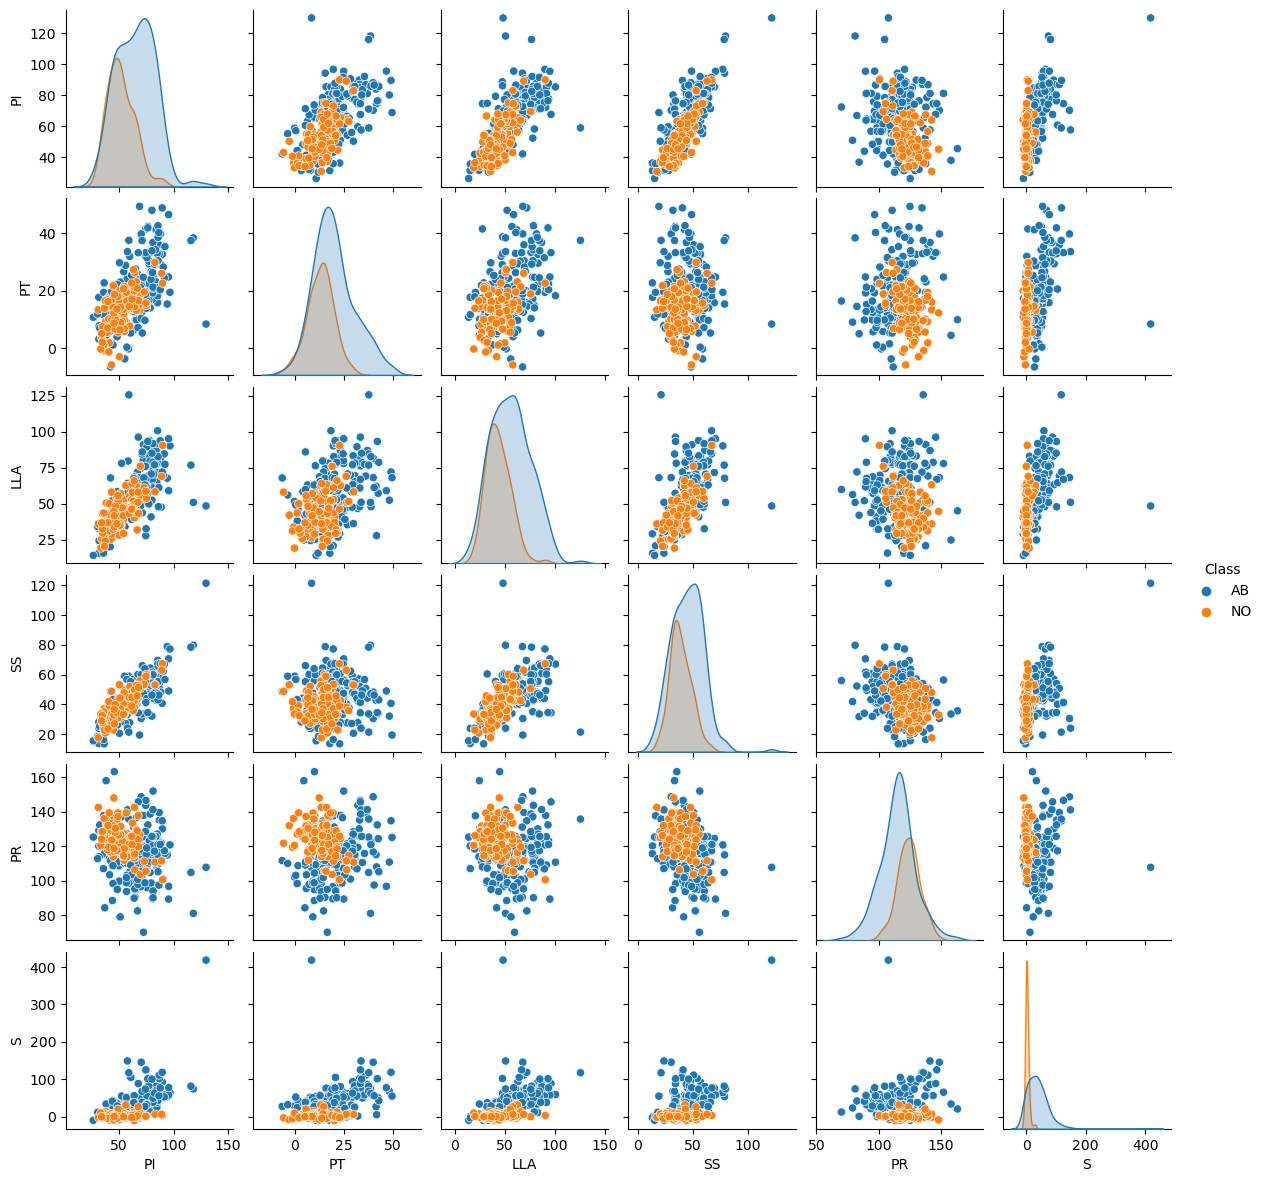

In [9]:
sns.pairplot(vc, hue="Class", size=2, diag_kind="kde")

In [10]:
vc['Class'] = vc['Class'].map({'NO': 0, 'AB': 1})

In [11]:
vc.describe()

,PI,PT,LLA,SS,PR,S,Class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496484,17.542903,51.930710,42.953871,117.920548,26.296742,0.677419
std,17.236109,10.008140,18.553766,13.422748,13.317629,37.558883,0.468220
min,26.150000,-6.550000,14.000000,13.370000,70.080000,-11.060000,0.000000
25%,46.432500,10.667500,37.000000,33.347500,110.710000,1.600000,0.000000
50%,58.690000,16.360000,49.565000,42.405000,118.265000,11.765000,1.000000
75%,72.880000,22.120000,63.000000,52.692500,125.467500,41.285000,1.000000
max,129.830000,49.430000,125.740000,121.430000,163.070000,418.540000,1.000000


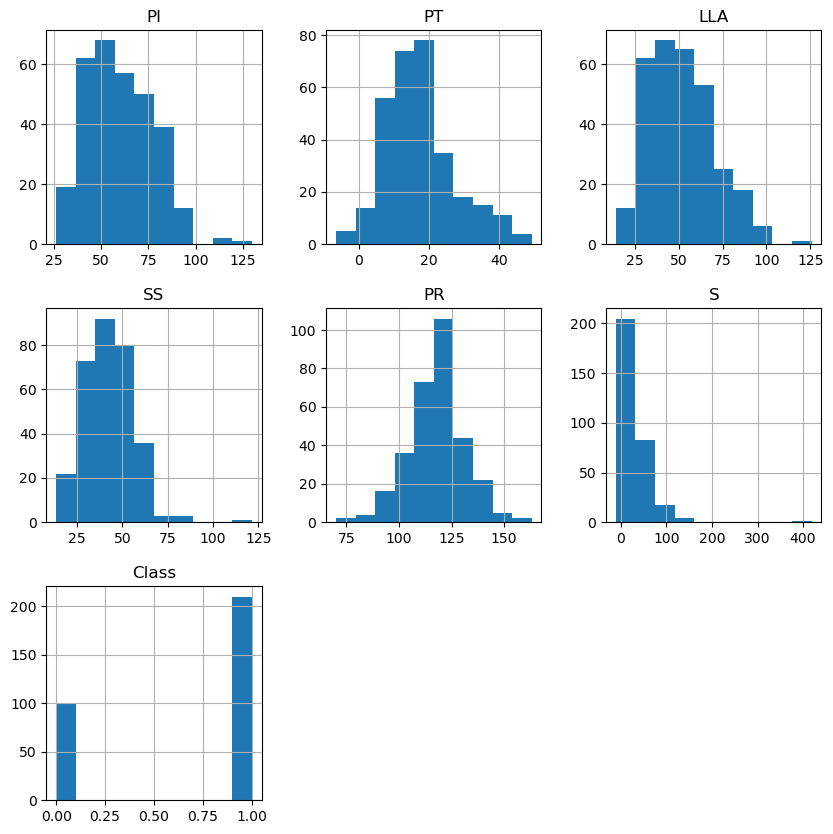

In [12]:
vc.hist(bins=10, figsize=(10,10))
plt.show()

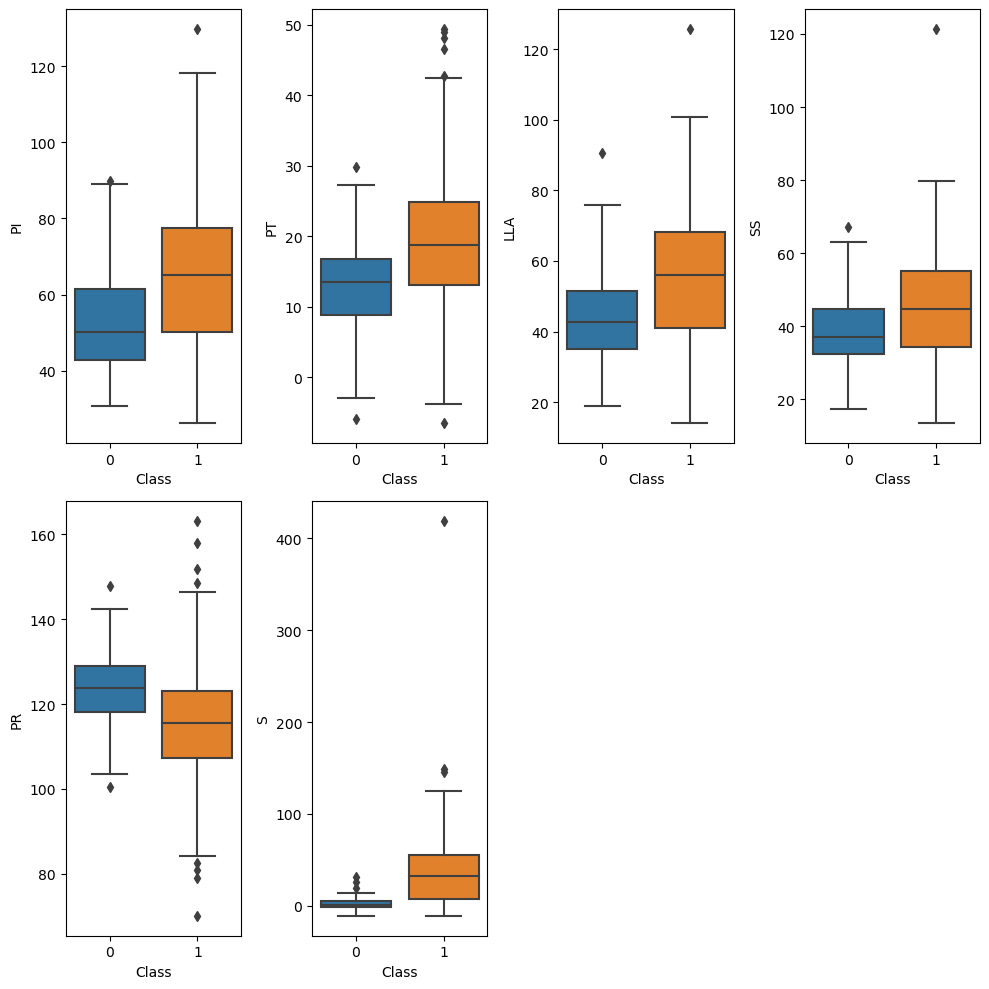

In [13]:
cols = vc.columns.to_list()
cols.remove('Class')
plt.figure(figsize=(10,10))
for i in range(len(cols)):
 plt.subplot(2, 4, i+1)
 sns.boxplot(data=vc, x=vc['Class'], y=cols[i])
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

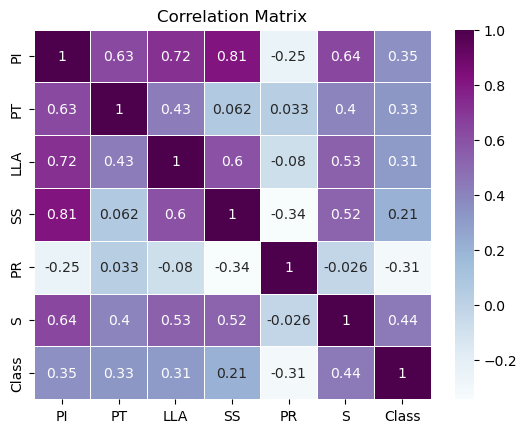

In [14]:
corr_matrix = vc.corr()
sns.heatmap(corr_matrix, xticklabels=True, yticklabels=True, linewidth=0.5, cmap='BuPu', annot=True)
plt.title('Correlation Matrix')

In [15]:
Y = vc['Class']
del vc['Class']
X = vc

In [17]:
from sklearn.model_selection import train_test_split

seed = 42
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

kNN

In [128]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

Chi square feature selection

In [223]:
from sklearn import datasets
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [226]:
from sklearn.preprocessing import QuantileTransformer

In [227]:
qt = QuantileTransformer(output_distribution='uniform')
Xt = qt.fit_transform(X)

C:\Users\joearthur\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (310). n_quantiles is set to n_samples.
  warnings.warn(


In [264]:
for i in range(1,7):
    chi2_selector = SelectKBest(chi2, k=i)
    X_kbest = chi2_selector.fit_transform(Xt, Y)

    features_selected = np.array(X.columns)[chi2_selector.get_support()]
    print('For K =',i,'selected features are', features_selected)

For K = 1 selected features are ['S']
For K = 2 selected features are ['PI' 'S']
For K = 3 selected features are ['PI' 'PR' 'S']
For K = 4 selected features are ['PI' 'PT' 'PR' 'S']
For K = 5 selected features are ['PI' 'PT' 'LLA' 'PR' 'S']
For K = 6 selected features are ['PI' 'PT' 'LLA' 'SS' 'PR' 'S']


Standard scaling

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

Splitting

In [253]:
from sklearn import model_selection

In [ ]:
Y = vc['Class']
del vc['Class']
X = vc

In [ ]:
seed = 42
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [257]:
# transformed X
Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, Y, test_size=test_size, random_state=seed)

In [305]:
# scaled X
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, Y, test_size=test_size, random_state=seed)

KNN running

Normal X

Minimum error:  0.0967741935483871 at K = 4


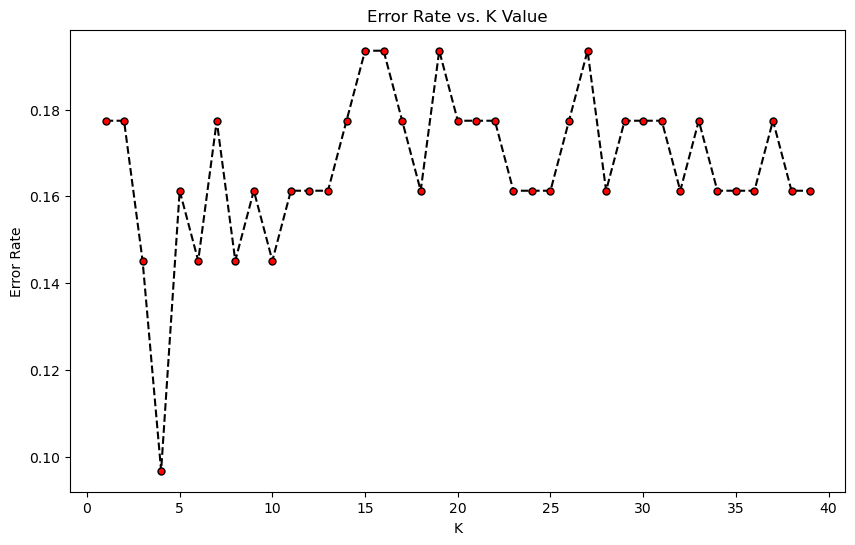

In [255]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='k', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error: ",min(error_rate),"at K =",(error_rate.index(min(error_rate)) + 1))

Maximum accuracy:- 0.90323 at K = 4


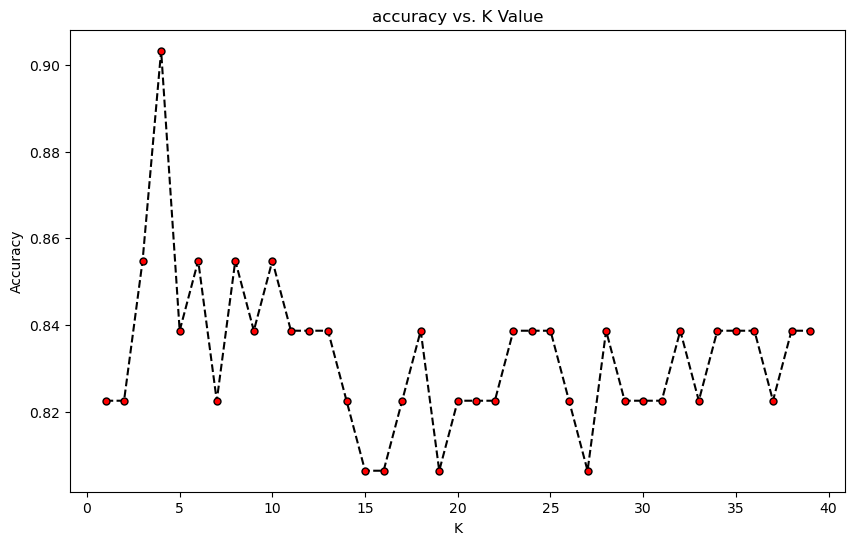

In [299]:
acc = []
from sklearn import metrics
for i in range(1,40):
    n = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = n.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'k',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=5)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",round(max(acc),5),"at K =",(acc.index(max(acc)) + 1))

Scaled X

Minimum error:  0.16129032258064516 at K = 6


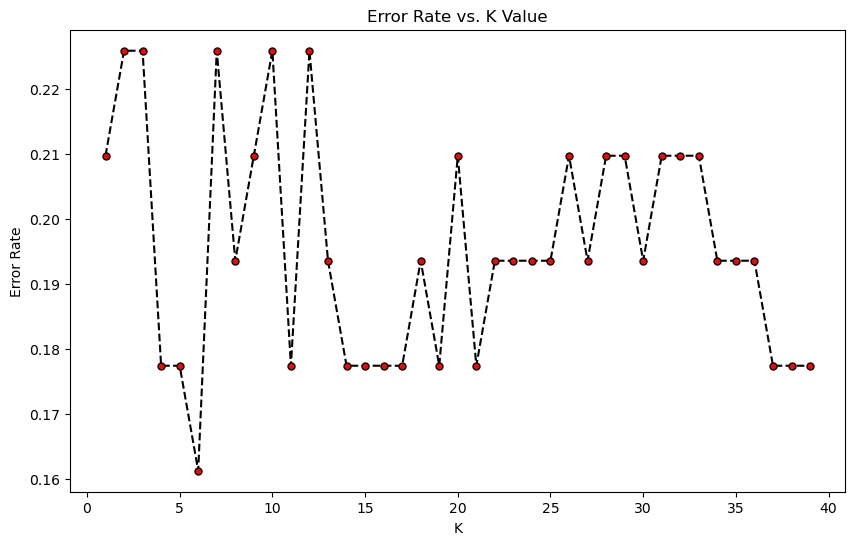

In [306]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(Xs_train,ys_train)
 pred_i = knn.predict(Xs_test)
 error_rate.append(np.mean(pred_i != ys_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='k', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error: ",min(error_rate),"at K =",(error_rate.index(min(error_rate)) + 1))

Maximum accuracy:- 0.83871 at K = 6


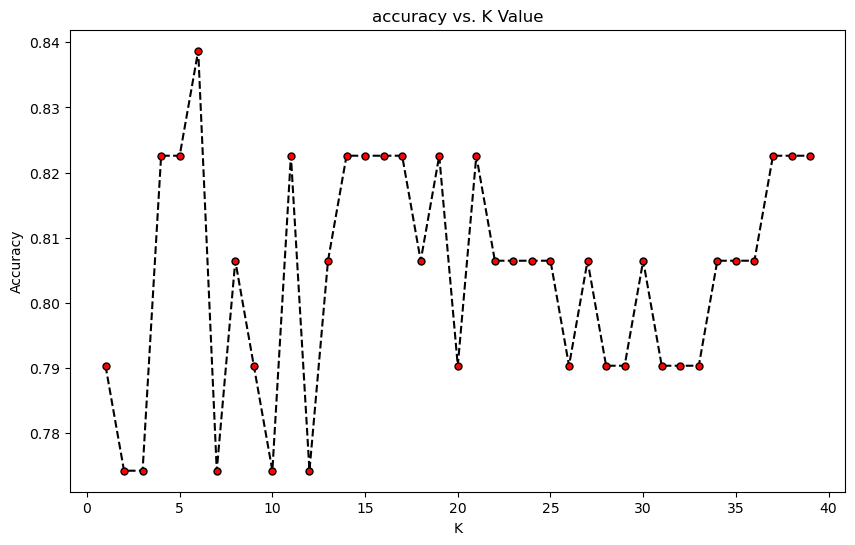

In [307]:
acc = []
from sklearn import metrics
for i in range(1,40):
    n = KNeighborsClassifier(n_neighbors = i).fit(Xs_train,ys_train)
    yhat = n.predict(Xs_test)
    acc.append(metrics.accuracy_score(ys_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'k',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=5)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",round(max(acc),5),"at K =",(acc.index(max(acc)) + 1))

Transformed X

Minimum error:  0.08065 at K = 6


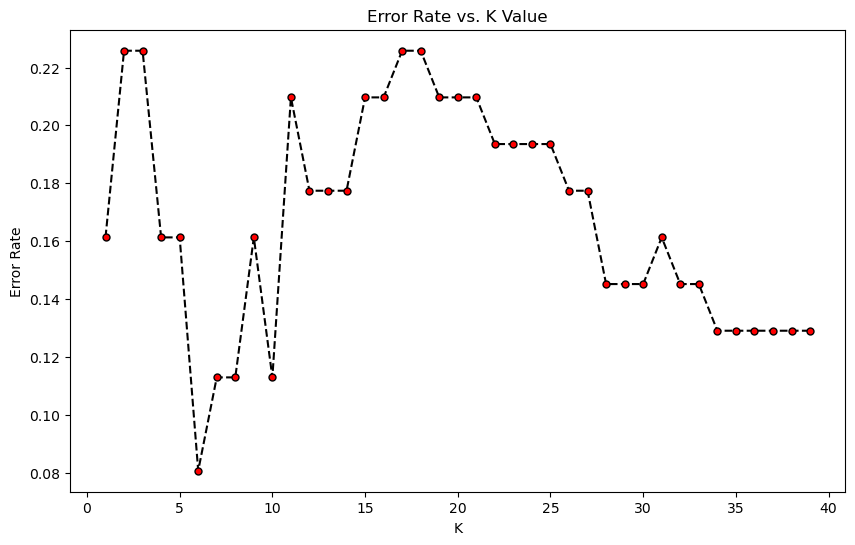

In [300]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(Xt_train,yt_train)
 pred_i = knn.predict(Xt_test)
 error_rate.append(np.mean(pred_i != yt_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='k', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error: ",round(min(error_rate),5),"at K =",(error_rate.index(min(error_rate)) + 1))

Maximum accuracy:- 0.91935 at K = 6


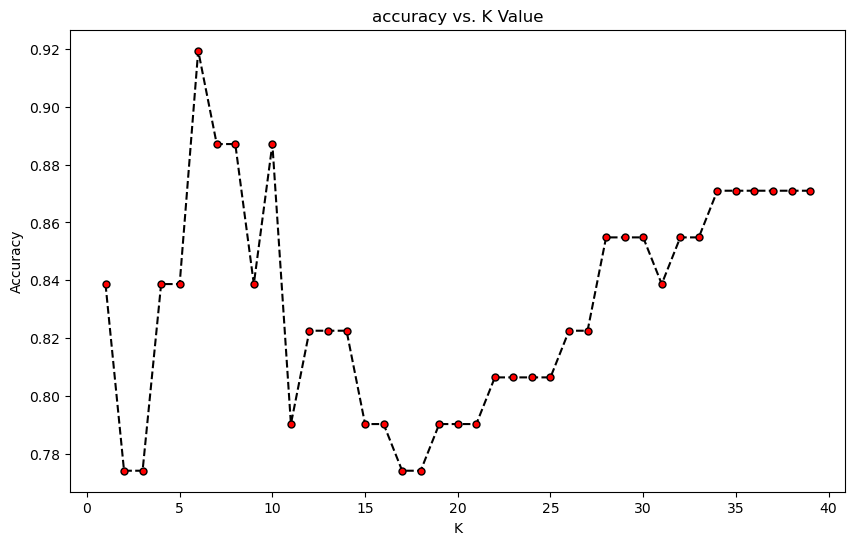

In [301]:
acc = []
from sklearn import metrics
for i in range(1,40):
    n = KNeighborsClassifier(n_neighbors = i).fit(Xt_train,yt_train)
    yhat = n.predict(Xt_test)
    acc.append(metrics.accuracy_score(yt_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'k',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=5)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",round(max(acc),5),"at K =",(acc.index(max(acc)) + 1))

In [267]:
X1 = vc['S']
X2 = vc[['PI','S']]
X3 = vc[['PI','PR','S']]
X4 = vc[['PI','PT','PR','S']]
X5 = vc[['PI','PT','LLA','PR','S']]

In [278]:
# X = 1
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y, test_size=test_size, random_state=seed)

In [451]:
X1 = X1.array
X1_train = X1_train.array
X1_test = X1_test.array

In [452]:
X1 = X1.reshape(-1, 1)
X1_train = X1_train.reshape(-1, 1)
X1_test = X1_test.reshape(-1, 1)

Minimum error:  0.1935483870967742 at K = 4


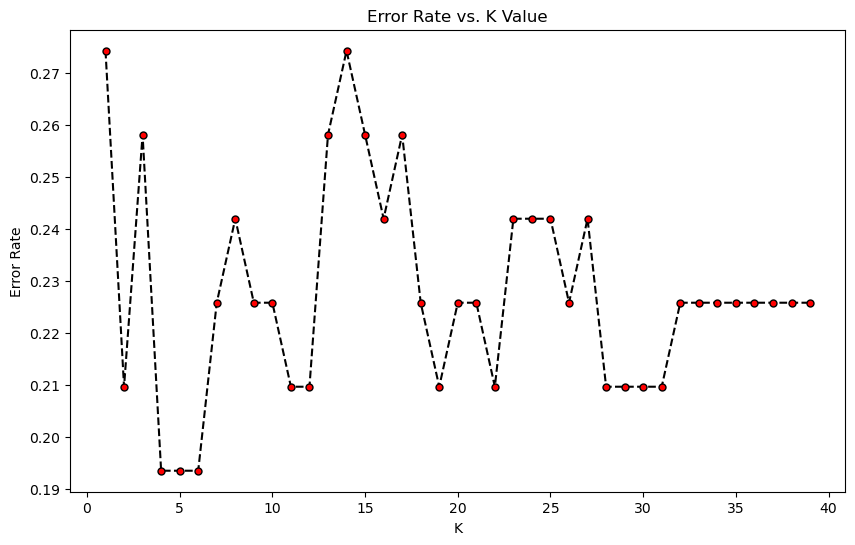

In [281]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X1_train,y1_train)
 pred_i = knn.predict(X1_test)
 error_rate.append(np.mean(pred_i != y1_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='k', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error: ",min(error_rate),"at K =",(error_rate.index(min(error_rate)) + 1))

In [283]:
# X = 2
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y, test_size=test_size, random_state=seed)

Minimum error:  0.16129032258064516 at K = 11


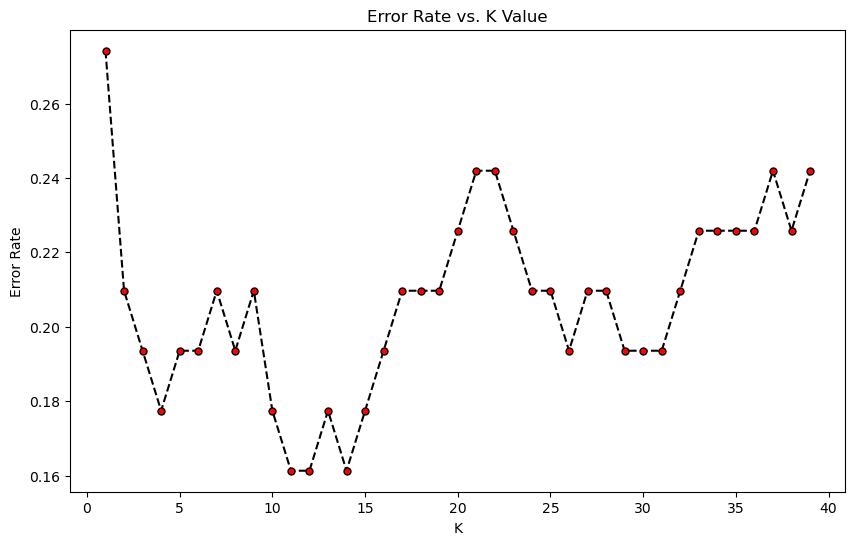

In [284]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X2_train,y2_train)
 pred_i = knn.predict(X2_test)
 error_rate.append(np.mean(pred_i != y2_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='k', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error: ",min(error_rate),"at K =",(error_rate.index(min(error_rate)) + 1))

In [286]:
# X = 3
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, Y, test_size=test_size, random_state=seed)

Minimum error:  0.12903225806451613 at K = 1


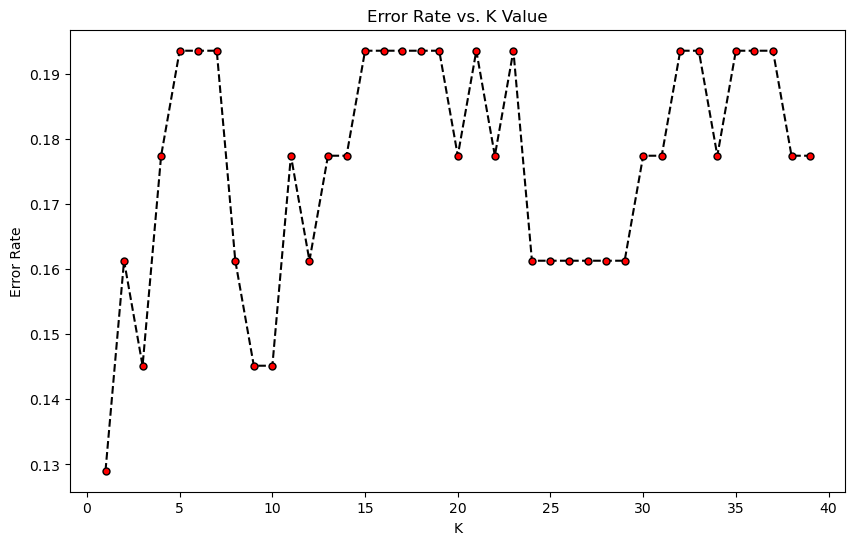

In [287]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X3_train,y3_train)
 pred_i = knn.predict(X3_test)
 error_rate.append(np.mean(pred_i != y3_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='k', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error: ",min(error_rate),"at K =",(error_rate.index(min(error_rate)) + 1))

In [388]:
X4t = qt.fit_transform(X4)
X5t = qt.fit_transform(X5)

C:\Users\joearthur\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (310). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\joearthur\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (310). n_quantiles is set to n_samples.
  warnings.warn(


In [386]:
# X = 4
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, Y, test_size=test_size, random_state=seed)

Minimum error:  0.11290322580645161 at K = 7


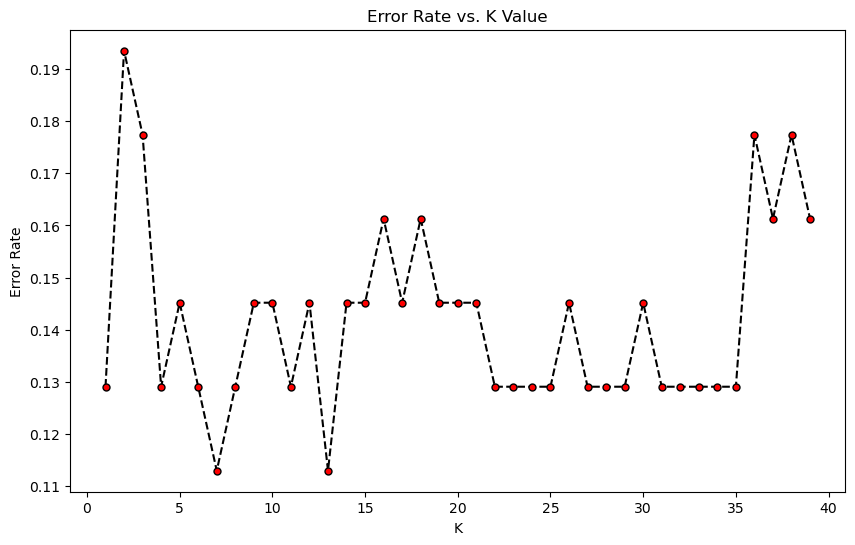

In [387]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X4_train,y4_train)
 pred_i = knn.predict(X4_test)
 error_rate.append(np.mean(pred_i != y4_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='k', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error: ",min(error_rate),"at K =",(error_rate.index(min(error_rate)) + 1))

In [391]:
# X = 5
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, Y, test_size=test_size, random_state=seed)

Minimum error:  0.11290322580645161 at K = 7


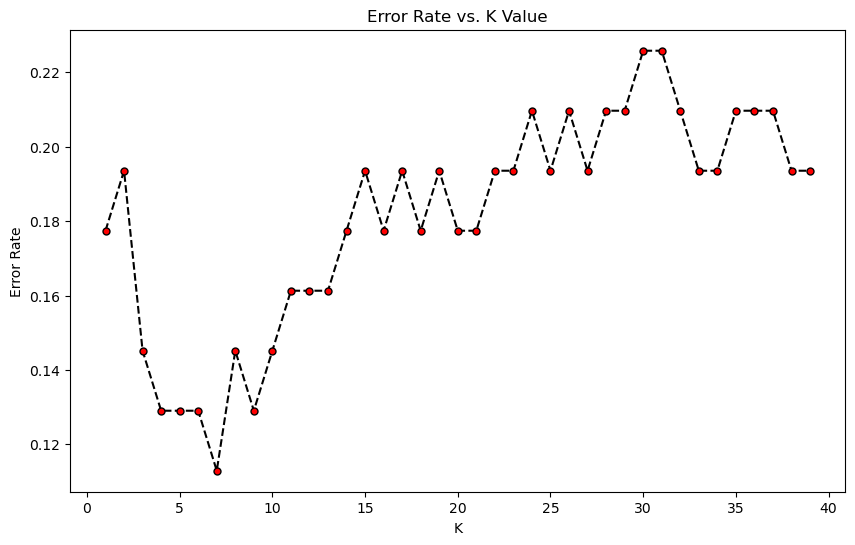

In [392]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X5_train,y5_train)
 pred_i = knn.predict(X5_test)
 error_rate.append(np.mean(pred_i != y5_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='k', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error: ",min(error_rate),"at K =",(error_rate.index(min(error_rate)) + 1))

In [393]:
# X = 5, transformed
X5t_train, X5t_test, y5t_train, y5t_test = train_test_split(X5t, Y, test_size=test_size, random_state=seed)

Minimum error:  0.11290322580645161 at K = 10


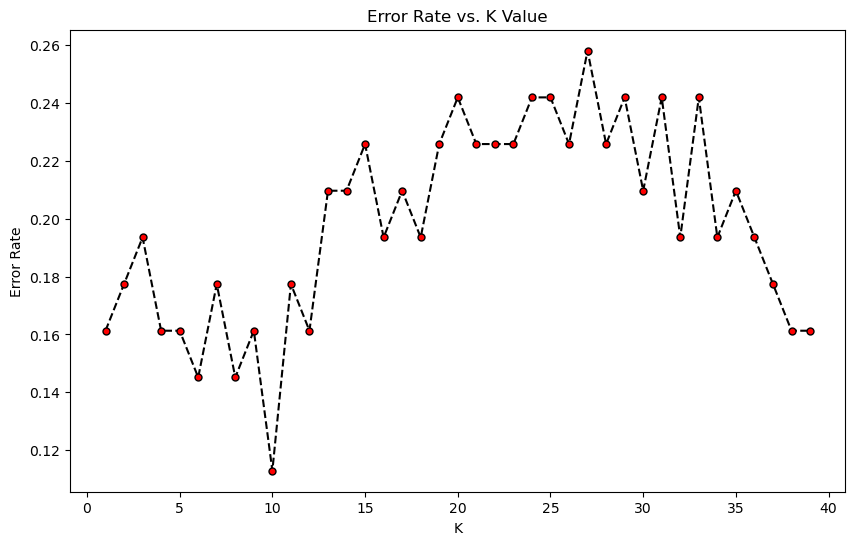

In [394]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X5t_train,y5t_train)
 pred_i = knn.predict(X5t_test)
 error_rate.append(np.mean(pred_i != y5t_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='k', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error: ",min(error_rate),"at K =",(error_rate.index(min(error_rate)) + 1))

In [117]:
from sklearn.metrics import confusion_matrix

In [195]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report

In [292]:
# K = 6 for transformed x
knn6t = KNeighborsClassifier(n_neighbors=6)
knn6t.fit(Xt_train, yt_train)

KNeighborsClassifier(n_neighbors=6)

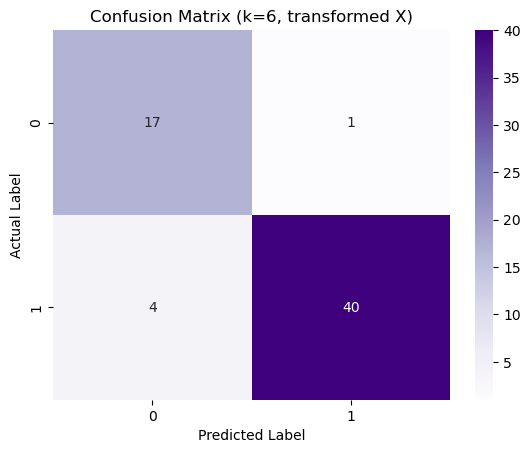

In [296]:
yt_pred = knn6t.predict(Xt_test)

conf_t = confusion_matrix(yt_test, yt_pred)
sns.heatmap(conf_t, annot=True, cmap='Purples')
plt.title('Confusion Matrix (k=6, transformed X)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [297]:
acc_t = accuracy_score(yt_test, yt_pred)
pre_t = precision_score(yt_test, yt_pred)
rec_t = recall_score(yt_test, yt_pred)
f1_t = f1_score(yt_test, yt_pred)
print('Accuracy: ' + str(round(acc_t,3)))
print('Precision ' + str(round(pre_t, 3)))
print('Recall: ' + str(round(rec_t,3)))
print('F1-score: ' + str(round(f1_t,3)))
print(classification_report(yt_test, yt_pred))

Accuracy: 0.919
Precision 0.976
Recall: 0.909
F1-score: 0.941
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        18
           1       0.98      0.91      0.94        44

    accuracy                           0.92        62
   macro avg       0.89      0.93      0.91        62
weighted avg       0.93      0.92      0.92        62



In [410]:
knn6s = KNeighborsClassifier(n_neighbors=6)
knn6s.fit(Xs_train, ys_train)
ys_pred = knn6s.predict(Xs_test)

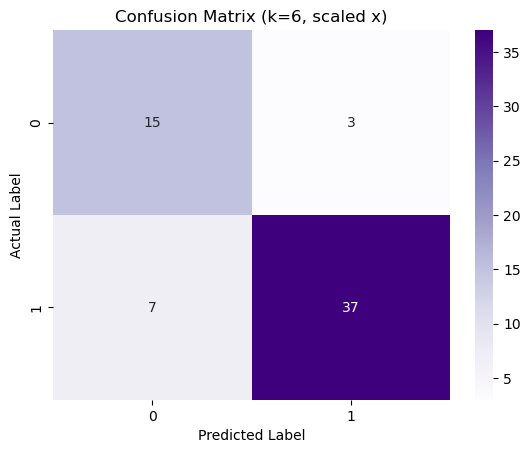

In [415]:
ys_pred = knn6s.predict(Xs_test)

conf_s = confusion_matrix(ys_test, ys_pred)
sns.heatmap(conf_s, annot=True, cmap='Purples')
plt.title('Confusion Matrix (k=6, scaled x)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [416]:
acc_s = accuracy_score(ys_test, ys_pred)
pre_s = precision_score(ys_test, ys_pred)
rec_s = recall_score(ys_test, ys_pred)
f1_s = f1_score(ys_test, ys_pred)
print('Accuracy: ' + str(round(acc_s,3)))
print('Precision ' + str(round(pre_s, 3)))
print('Recall: ' + str(round(rec_s,3)))
print('F1-score: ' + str(round(f1_s,3)))
print(classification_report(ys_test, ys_pred))

Accuracy: 0.839
Precision 0.925
Recall: 0.841
F1-score: 0.881
              precision    recall  f1-score   support

           0       0.68      0.83      0.75        18
           1       0.93      0.84      0.88        44

    accuracy                           0.84        62
   macro avg       0.80      0.84      0.82        62
weighted avg       0.85      0.84      0.84        62



In [310]:
knn4n = KNeighborsClassifier(n_neighbors=4)
knn4n.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

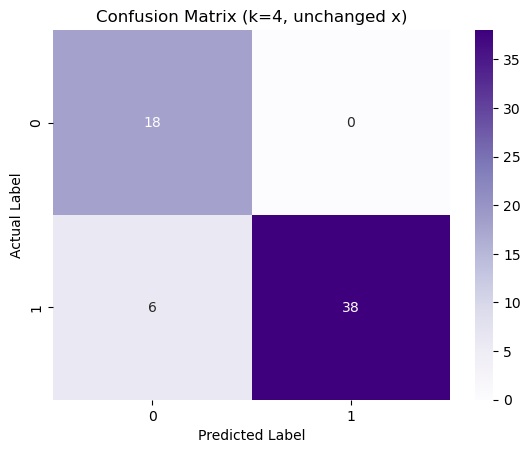

In [333]:
y_pred = knn4n.predict(X_test)

conf_n = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_n, annot=True, cmap='Purples')
plt.title('Confusion Matrix (k=4, unchanged x)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [335]:
acc_n = accuracy_score(y_test, y_pred)
pre_n = precision_score(y_test, y_pred)
rec_n = recall_score(y_test, y_pred)
f1_n = f1_score(y_test, y_pred)
print('Accuracy: ' + str(round(acc_n,3)))
print('Precision ' + str(round(pre_n, 3)))
print('Recall: ' + str(round(rec_n,3)))
print('F1-score: ' + str(round(f1_n,3)))
print(classification_report(y_test, y_pred))

Accuracy: 0.903
Precision 1.0
Recall: 0.864
F1-score: 0.927
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        18
           1       1.00      0.86      0.93        44

    accuracy                           0.90        62
   macro avg       0.88      0.93      0.89        62
weighted avg       0.93      0.90      0.91        62



In [316]:
knn4tc = KNeighborsClassifier(n_neighbors=7)
knn4tc.fit(X4_train, y4_train)

KNeighborsClassifier(n_neighbors=7)

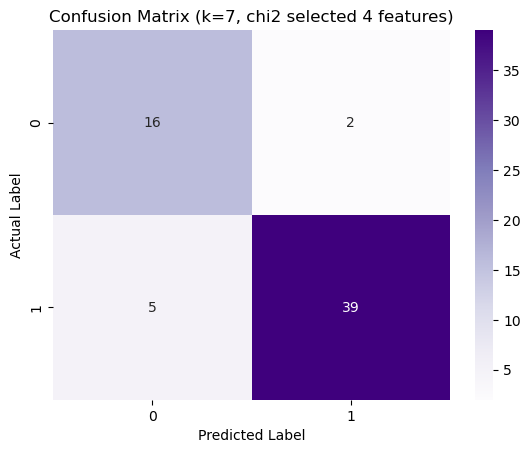

In [398]:
y4_pred = knn4tc.predict(X4_test)

conf_4 = confusion_matrix(y4_test, y4_pred)
sns.heatmap(conf_4, annot=True, cmap='Purples')
plt.title('Confusion Matrix (k=7, chi2 selected 4 features)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [322]:
acc_4 = accuracy_score(y4_test, y4_pred)
pre_4 = precision_score(y4_test, y4_pred)
rec_4 = recall_score(y4_test, y4_pred)
f1_4 = f1_score(y4_test, y4_pred)
print('Accuracy: ' + str(round(acc_4,3)))
print('Precision ' + str(round(pre_4, 3)))
print('Recall: ' + str(round(rec_4,3)))
print('F1-score: ' + str(round(f1_4,3)))
print(classification_report(y4_test, y4_pred))

Accuracy: 0.887
Precision 0.951
Recall: 0.886
F1-score: 0.918
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        18
           1       0.95      0.89      0.92        44

    accuracy                           0.89        62
   macro avg       0.86      0.89      0.87        62
weighted avg       0.90      0.89      0.89        62



In [317]:
knn5tc = KNeighborsClassifier(n_neighbors=7)
knn5tc.fit(X5_train, y5_train)

KNeighborsClassifier(n_neighbors=7)

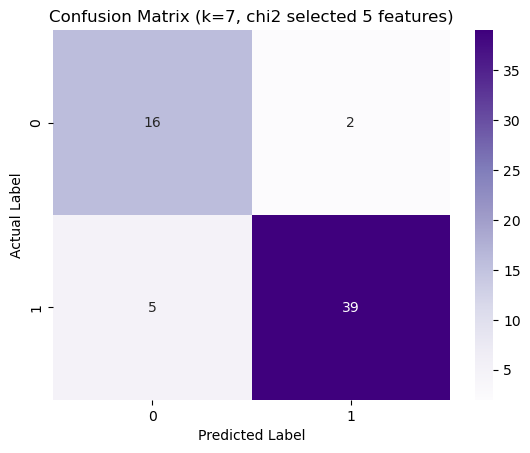

In [397]:
y5_pred = knn5tc.predict(X5_test)

conf_5 = confusion_matrix(y5_test, y5_pred)
sns.heatmap(conf_5, annot=True, cmap='Purples')
plt.title('Confusion Matrix (k=7, chi2 selected 5 features)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [327]:
acc_5 = accuracy_score(y5_test, y5_pred)
pre_5 = precision_score(y5_test, y5_pred)
rec_5 = recall_score(y5_test, y5_pred)
f1_5 = f1_score(y5_test, y5_pred)
print('Accuracy: ' + str(round(acc_5,3)))
print('Precision ' + str(round(pre_5, 3)))
print('Recall: ' + str(round(rec_5,3)))
print('F1-score: ' + str(round(f1_5,3)))
print(classification_report(y5_test, y5_pred))

Accuracy: 0.887
Precision 0.951
Recall: 0.886
F1-score: 0.918
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        18
           1       0.95      0.89      0.92        44

    accuracy                           0.89        62
   macro avg       0.86      0.89      0.87        62
weighted avg       0.90      0.89      0.89        62



ROC Curve

In [395]:
knn5t10 = KNeighborsClassifier(n_neighbors=10)
knn5t10.fit(X5t_train, y5t_train)

KNeighborsClassifier(n_neighbors=10)

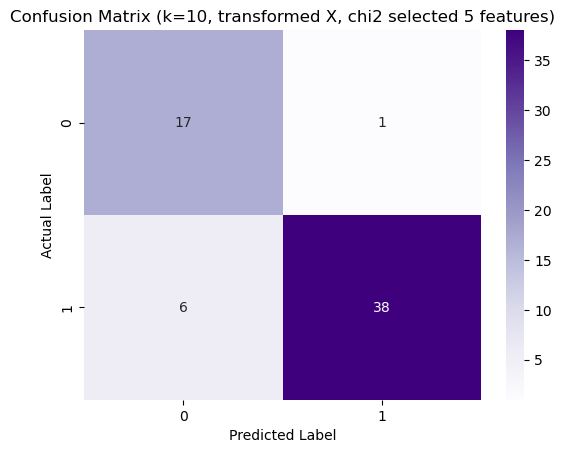

In [396]:
y5t_pred = knn5t10.predict(X5t_test)

conf_5t = confusion_matrix(y5t_test, y5t_pred)
sns.heatmap(conf_5t, annot=True, cmap='Purples')
plt.title('Confusion Matrix (k=10, transformed X, chi2 selected 5 features)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [399]:
acc_5t = accuracy_score(y5t_test, y5t_pred)
pre_5t = precision_score(y5t_test, y5t_pred)
rec_5t = recall_score(y5t_test, y5t_pred)
f1_5t = f1_score(y5t_test, y5t_pred)
print('Accuracy: ' + str(round(acc_5t,3)))
print('Precision ' + str(round(pre_5t, 3)))
print('Recall: ' + str(round(rec_5t,3)))
print('F1-score: ' + str(round(f1_5t,3)))
print(classification_report(y5t_test, y5t_pred))

Accuracy: 0.887
Precision 0.974
Recall: 0.864
F1-score: 0.916
              precision    recall  f1-score   support

           0       0.74      0.94      0.83        18
           1       0.97      0.86      0.92        44

    accuracy                           0.89        62
   macro avg       0.86      0.90      0.87        62
weighted avg       0.91      0.89      0.89        62



In [308]:
from sklearn.metrics import roc_curve, roc_auc_score

In [401]:
t_probs = knn6t.predict_proba(Xt_test)
s_probs = knn6s.predict_proba(Xs_test)
n_probs = knn4n.predict_proba(X_test)
cs4_probs = knn4tc.predict_proba(X4_test)
cs5_probs = knn5tc.predict_proba(X5_test)
cs5t_probs = knn5t10.predict_proba(X5t_test)

In [402]:
t_probs = t_probs[:,1]
s_probs = s_probs[:,1]
n_probs = n_probs[:,1]
cs4_probs = cs4_probs[:,1]
cs5_probs = cs5_probs[:,1]
cs5t_probs = cs5t_probs[:,1]
fpt, tpt, thresholdt = roc_curve(yt_test, t_probs)
fps, tps, thresholds = roc_curve(ys_test, s_probs)
fpn, tpn, thresholdn = roc_curve(y_test, n_probs)
fp4, tp4, threshold4 = roc_curve(y4_test, cs4_probs)
fp5, tp5, threshold5 = roc_curve(y5_test, cs5_probs)
fp5t, tp5t, threshold5t = roc_curve(y5t_test, cs5t_probs)
roc_auc_t = metrics.auc(fpt, tpt)
roc_auc_s = metrics.auc(fps, tps)
roc_auc_n = metrics.auc(fpn, tpn)
roc_auc_4cs = metrics.auc(fp4, tp4)
roc_auc_5cs = metrics.auc(fp5, tp5)
roc_auc_5cst = metrics.auc(fp5t, tp5t)

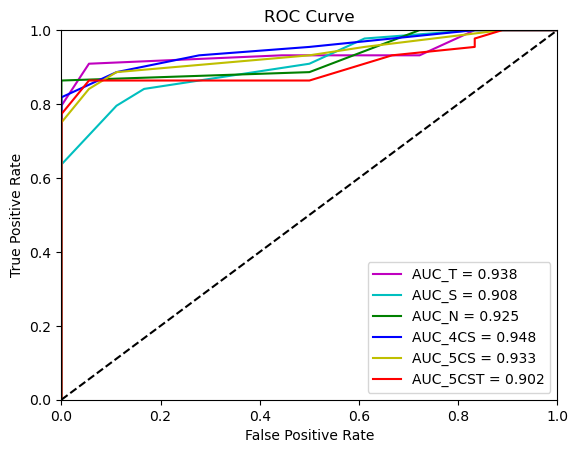

In [403]:
plt.title('ROC Curve')
plt.plot(fpt, tpt, 'm', label = 'AUC_T = %0.3f' % roc_auc_t)
plt.plot(fps, tps, 'c', label = 'AUC_S = %0.3f' % roc_auc_s)
plt.plot(fpn, tpn, 'g', label = 'AUC_N = %0.3f' % roc_auc_n)
plt.plot(fp4, tp4, 'b', label = 'AUC_4CS = %0.3f' % roc_auc_4cs)
plt.plot(fp5, tp5, 'y', label = 'AUC_5CS = %0.3f' % roc_auc_5cs)
plt.plot(fp5t, tp5t, 'r', label = 'AUC_5CST = %0.3f' % roc_auc_5cst)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [405]:
from sklearn.metrics import matthews_corrcoef as mc

In [414]:
mc_n = mc(y_test, y_pred)
mc_s = mc(ys_test, ys_pred)
mc_t = mc(yt_test, yt_pred)
mc_cs4 = mc(y4_test, y4_pred)
mc_cs5 = mc(y5_test, y5_pred)
mc_cs5t = mc(y5t_test, y5t_pred)
print('Normal X: ' + str(round(mc_n, 3)))
print('Scaled X: ' + str(round(mc_s, 3)))
print('Transformed X: ' + str(round(mc_t, 3)))
print('4 Feature X: ' + str(round(mc_cs4, 3)))
print('5 Feature X: ' + str(round(mc_cs5, 3)))
print('Transformed & 5 Feature X: ' + str(round(mc_cs5t, 3)))

Normal X: 0.805
Scaled X: 0.64
Transformed X: 0.819
4 Feature X: 0.744
5 Feature X: 0.744
Transformed & 5 Feature X: 0.759


K-means clustering

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant
from sklearn.decomposition import PCA
import statsmodels.api as sm

In [29]:
kmeans = KMeans(init="random", n_clusters=2, n_init=10, max_iter=300, random_state=seed)

In [453]:
X3t = qt.fit_transform(X3)
X2t = qt.fit_transform(X2)
X1t = qt.fit_transform(X1)

C:\Users\joearthur\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (310). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\joearthur\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (310). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\joearthur\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (310). n_quantiles is set to n_samples.
  warnings.warn(


In [639]:
kmeans.fit(X1t)

C:\Users\joearthur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(init='random', n_clusters=2, n_init=10, random_state=42)

In [640]:
print('Inertia: ' + str(round(kmeans.inertia_,3)))

score = silhouette_score(Xt, kmeans.labels_)
print('Silhouette: ' + str(round(score,3)))

Inertia: 6.502
Silhouette: 0.286


In [641]:
ari = adjusted_rand_score(Y, kmeans.labels_)
nmi = normalized_mutual_info_score(Y, kmeans.labels_)
print("Adjusted Rand Index:", ari)
print("Normalized Mutual Information:", nmi)

Adjusted Rand Index: 0.32040849822193856
Normalized Mutual Information: 0.3203369784830873


In [617]:
PI = vc['PI']
PR = vc['PR']
PT = vc['PT']
LLA = vc['LLA']
SS = vc['SS']

PI = PI.array
PR = PR.array
PT = PT.array
LLA = LLA.array
SS = SS.array

PI = PI.reshape(-1, 1)
PR = PR.reshape(-1, 1)
PT = PT.reshape(-1, 1)
LLA = LLA.reshape(-1, 1)
SS = SS.reshape(-1, 1)

PI = qt.fit_transform(PI)
PR = qt.fit_transform(PR)
PT = qt.fit_transform(PT)
LLA = qt.fit_transform(LLA)
SS = qt.fit_transform(SS)

C:\Users\joearthur\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (310). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\joearthur\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (310). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\joearthur\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (310). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\joearthur\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (310). n_quantiles is set to n_samples.
  warnings.warn(
C:\Users\joearthur\anaconda3\Lib\site-packages\sklearn\preprocessing\_data.py:2667: UserWarning: n_quantiles (1000) is greater than 

In [626]:
kmeans.fit(PR)

print('Inertia: ' + str(round(kmeans.inertia_,3)))

score = silhouette_score(Xt, kmeans.labels_)
print('Silhouette: ' + str(round(score,3)))

ari = adjusted_rand_score(Y, kmeans.labels_)
nmi = normalized_mutual_info_score(Y, kmeans.labels_)
print("Adjusted Rand Index:", round(ari,3))
print("Normalized Mutual Information:", round(nmi,3))

C:\Users\joearthur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Inertia: 6.501
Silhouette: 0.152
Adjusted Rand Index: 0.089
Normalized Mutual Information: 0.081


In [632]:
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42,}
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(Xt)
    sse.append(kmeans.inertia_)

C:\Users\joearthur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\joearthur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\joearthur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\joearthur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memor

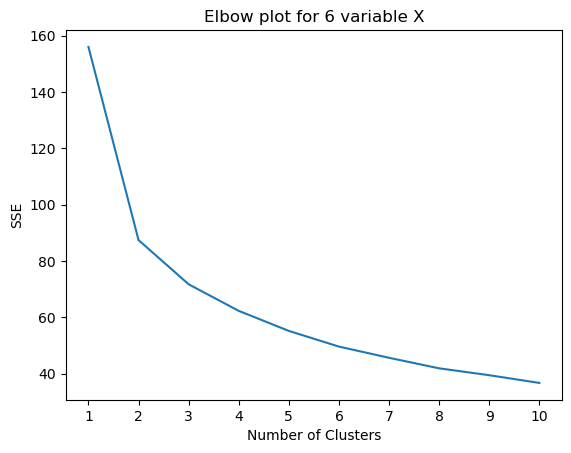

In [633]:
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title('Elbow plot for 6 variable X')
plt.show()

In [503]:
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X1t)
    score = silhouette_score(Xt, kmeans.labels_)
    silhouette_coefficients.append(score)
    

C:\Users\joearthur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\joearthur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\joearthur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\joearthur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memor

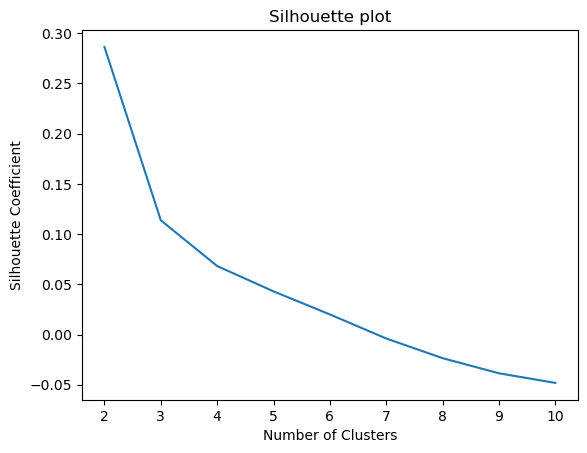

In [504]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title('Silhouette plot')
plt.show()

In [31]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

In [567]:
kmeans = KMeans(init="random", n_clusters=2, n_init=10, max_iter=300, random_state=seed)
kmeans.fit(X4t)

C:\Users\joearthur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(init='random', n_clusters=2, n_init=10, random_state=42)

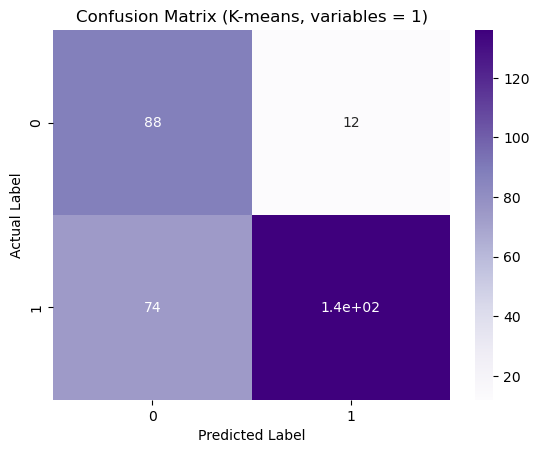

In [568]:
conf_K = confusion_matrix(Y, kmeans.labels_)
sns.heatmap(conf_K, annot=True, cmap='Purples')
plt.title('Confusion Matrix (K-means, variables = 1)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Transformation

PCA

In [22]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(Xs)

In [23]:
print(f'Original shape: {Xs.shape}, Transformed shape: {X_pca.shape}')

Original shape: (310, 6), Transformed shape: (310, 5)


In [30]:
kmeans.fit(X_pca)

print('Inertia: ' + str(round(kmeans.inertia_,3)))

score = silhouette_score(X_pca, kmeans.labels_)
print('Silhouette: ' + str(round(score,3)))

ari = adjusted_rand_score(Y, kmeans.labels_)
nmi = normalized_mutual_info_score(Y, kmeans.labels_)
print("Adjusted Rand Index:", round(ari,3))
print("Normalized Mutual Information:", round(nmi,3))

C:\Users\joearthur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Inertia: 1151.972
Silhouette: 0.365


NameError: name 'adjusted_rand_score' is not defined